https://medium.com/@preeti.rana.ai/using-a-pre-trained-image-classification-model-e-g-3ee5cfc7b896

# 2. Import Libraries

In [48]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 3. Load Data

In [49]:
from matplotlib import pyplot as plt

In [50]:
data = tf.keras.utils.image_dataset_from_directory('../dataset/smu_images')

Found 251 files belonging to 4 classes.


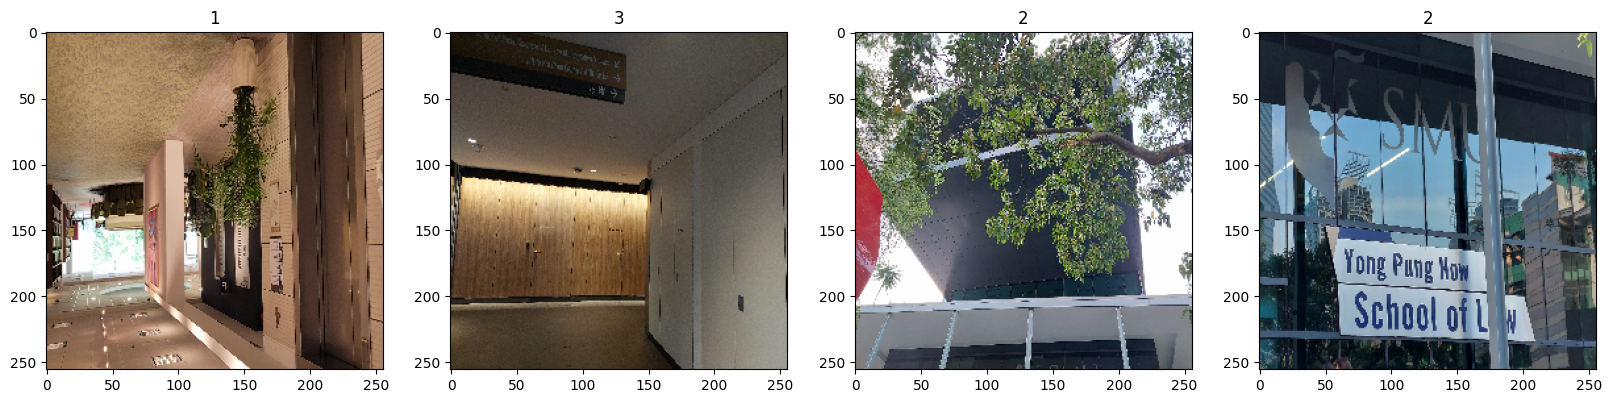

In [51]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [52]:
data = data.map(lambda x,y: (x/255, y))

In [53]:
data.as_numpy_iterator().next()

(array([[[[0.51177716, 0.57009804, 0.48292932],
          [0.49229282, 0.5589595 , 0.42579657],
          [0.4851419 , 0.54993874, 0.39084232],
          ...,
          [0.8509804 , 0.8862745 , 0.92156863],
          [0.8503437 , 0.8856378 , 0.9130888 ],
          [0.84705883, 0.88235295, 0.9098039 ]],
 
         [[0.4865129 , 0.5453364 , 0.4694173 ],
          [0.46967104, 0.5363377 , 0.4108475 ],
          [0.5055396 , 0.5729109 , 0.43032515],
          ...,
          [0.85490197, 0.8901961 , 0.91764706],
          [0.85751665, 0.89281076, 0.92026174],
          [0.8530637 , 0.8883578 , 0.9158088 ]],
 
         [[0.3963848 , 0.4498468 , 0.36397058],
          [0.43480104, 0.489703  , 0.3556344 ],
          [0.40483397, 0.4789455 , 0.34313056],
          ...,
          [0.85882354, 0.89411765, 0.92156863],
          [0.85882354, 0.89411765, 0.92156863],
          [0.85882354, 0.89411765, 0.92156863]],
 
         ...,
 
         [[0.46280637, 0.5223633 , 0.35009095],
          [0.10934

# 5. Split Data

In [54]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [55]:
train_size

5

In [56]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. ResNet Model

In [57]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [58]:
# Customise model
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='softmax')(x)

In [59]:
model = Model(inputs=base_model.input, outputs=predictions)

In [60]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [61]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

# 7. Fit the Model

In [62]:
# model.fit_generator(train_generator, steps_per_epoch=len(train_generator), epochs=5,
# validation_data=val_generator, validation_steps=len(val_generator))
hist = model.fit(train, epochs=3, validation_data=val)


Epoch 1/3


C:\Users\Jess\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 61s 5s/step - loss: 0.0000e+00 - accuracy: 0.2375 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 2/3
5/5 [==============================] - 25s 5s/step - loss: 0.0000e+00 - accuracy: 0.2000 - val_loss: 0.0000e+00 - val_accuracy: 0.1875
Epoch 3/3
5/5 [==============================] - 25s 5s/step - loss: 0.0000e+00 - accuracy: 0.2000 - val_loss: 0.0000e+00 - val_accuracy: 0.2188


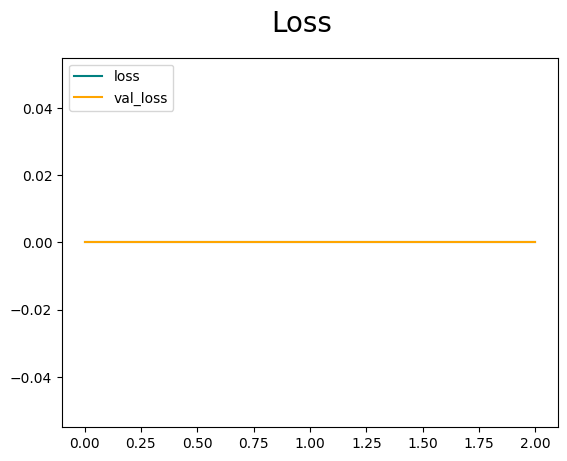

[0.0, 0.0, 0.0]


[0.0, 0.0, 0.0]

In [63]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()
print(hist.history['loss'])
hist.history['val_loss']

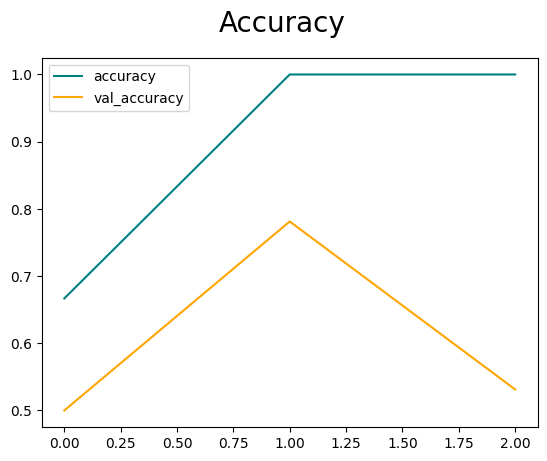

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()